                                    Project : Customer Segmentation

In [31]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

In [32]:
df = pd.read_csv('data.csv',encoding='unicode_escape')

In [33]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


## Preprocessing Data

With the transaction data above, we need to build different customer segments based on each user’s purchase behavior.

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [35]:
# convert date column to datetime format
df['Date']= pd.to_datetime(df['InvoiceDate'])

In [36]:
# keep only the most recent date of purchase
df['rank'] = df.sort_values(['CustomerID','Date']).groupby(['CustomerID'])['Date'].rank(method='min').astype(int)
df_rec = df[df['rank']==1]

In [37]:
df_rec['recency'] = (df_rec['Date'] - pd.to_datetime(min(df_rec['Date']))).dt.days

In [38]:
df_rec

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Date,rank,recency
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,2010-12-01 08:26:00,1,0
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,2010-12-01 08:26:00,1,0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,2010-12-01 08:26:00,1,0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,2010-12-01 08:26:00,1,0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,2010-12-01 08:26:00,1,0
...,...,...,...,...,...,...,...,...,...,...,...
541801,581578,22993,SET OF 4 PANTRY JELLY MOULDS,12,12/9/2011 12:16,1.25,12713.0,Germany,2011-12-09 12:16:00,1,373
541802,581578,22907,PACK OF 20 NAPKINS PANTRY DESIGN,12,12/9/2011 12:16,0.85,12713.0,Germany,2011-12-09 12:16:00,1,373
541803,581578,22908,PACK OF 20 NAPKINS RED APPLES,12,12/9/2011 12:16,0.85,12713.0,Germany,2011-12-09 12:16:00,1,373
541804,581578,23215,JINGLE BELL HEART ANTIQUE SILVER,12,12/9/2011 12:16,2.08,12713.0,Germany,2011-12-09 12:16:00,1,373


In [39]:
freq = df_rec.groupby('CustomerID')['Date'].count()
df_freq = pd.DataFrame(freq).reset_index()
df_freq.columns = ['CustomerID','frequency']

In [40]:
df_freq

,CustomerID,frequency
0,12346.0,1
1,12347.0,31
2,12348.0,17
3,12349.0,73
4,12350.0,17
...,...,...
4367,18280.0,10
4368,18281.0,7
4369,18282.0,7
4370,18283.0,57


In [41]:
rec_freq = df_freq.merge(df_rec,on='CustomerID')
rec_freq

,CustomerID,frequency,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Country,Date,rank,recency
0,12346.0,1,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,1/18/2011 10:01,1.04,United Kingdom,2011-01-18 10:01:00,1,48
1,12347.0,31,537626,85116,BLACK CANDELABRA T-LIGHT HOLDER,12,12/7/2010 14:57,2.10,Iceland,2010-12-07 14:57:00,1,6
2,12347.0,31,537626,22375,AIRLINE BAG VINTAGE JET SET BROWN,4,12/7/2010 14:57,4.25,Iceland,2010-12-07 14:57:00,1,6
3,12347.0,31,537626,71477,COLOUR GLASS. STAR T-LIGHT HOLDER,12,12/7/2010 14:57,3.25,Iceland,2010-12-07 14:57:00,1,6
4,12347.0,31,537626,22492,MINI PAINT SET VINTAGE,36,12/7/2010 14:57,0.65,Iceland,2010-12-07 14:57:00,1,6
...,...,...,...,...,...,...,...,...,...,...,...,...
100805,18287.0,29,554065,85040A,S/4 PINK FLOWER CANDLES IN BOWL,36,5/22/2011 10:39,1.65,United Kingdom,2011-05-22 10:39:00,1,172
100806,18287.0,29,554065,85039B,S/4 IVORY MINI ROSE CANDLE IN BOWL,60,5/22/2011 10:39,1.45,United Kingdom,2011-05-22 10:39:00,1,172
100807,18287.0,29,554065,85039B,S/4 IVORY MINI ROSE CANDLE IN BOWL,12,5/22/2011 10:39,1.65,United Kingdom,2011-05-22 10:39:00,1,172
100808,18287.0,29,554065,85040A,S/4 PINK FLOWER CANDLES IN BOWL,12,5/22/2011 10:39,1.65,United Kingdom,2011-05-22 10:39:00,1,172


In [42]:
rec_freq['total'] = rec_freq['Quantity']*df['UnitPrice']
m = rec_freq.groupby('CustomerID')['total'].sum()
m = pd.DataFrame(m).reset_index()
m.columns = ['CustomerID','monetary_value']

In [43]:
m

,CustomerID,monetary_value
0,12346.0,189248.25
1,12347.0,1246.73
2,12348.0,4311.90
3,12349.0,1618.81
4,12350.0,553.25
...,...,...
4367,18280.0,229.79
4368,18281.0,92.29
4369,18282.0,159.91
4370,18283.0,201.54


In [44]:
rfm = m.merge(rec_freq,on='CustomerID')

In [45]:
rfm

,CustomerID,monetary_value,frequency,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Country,Date,rank,recency,total
0,12346.0,189248.25,1,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,1/18/2011 10:01,1.04,United Kingdom,2011-01-18 10:01:00,1,48,189248.25
1,12347.0,1246.73,31,537626,85116,BLACK CANDELABRA T-LIGHT HOLDER,12,12/7/2010 14:57,2.10,Iceland,2010-12-07 14:57:00,1,6,40.68
2,12347.0,1246.73,31,537626,22375,AIRLINE BAG VINTAGE JET SET BROWN,4,12/7/2010 14:57,4.25,Iceland,2010-12-07 14:57:00,1,6,11.00
3,12347.0,1246.73,31,537626,71477,COLOUR GLASS. STAR T-LIGHT HOLDER,12,12/7/2010 14:57,3.25,Iceland,2010-12-07 14:57:00,1,6,40.68
4,12347.0,1246.73,31,537626,22492,MINI PAINT SET VINTAGE,36,12/7/2010 14:57,0.65,Iceland,2010-12-07 14:57:00,1,6,122.04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100805,18287.0,863.40,29,554065,85040A,S/4 PINK FLOWER CANDLES IN BOWL,36,5/22/2011 10:39,1.65,United Kingdom,2011-05-22 10:39:00,1,172,70.20
100806,18287.0,863.40,29,554065,85039B,S/4 IVORY MINI ROSE CANDLE IN BOWL,60,5/22/2011 10:39,1.45,United Kingdom,2011-05-22 10:39:00,1,172,153.00
100807,18287.0,863.40,29,554065,85039B,S/4 IVORY MINI ROSE CANDLE IN BOWL,12,5/22/2011 10:39,1.65,United Kingdom,2011-05-22 10:39:00,1,172,30.60
100808,18287.0,863.40,29,554065,85040A,S/4 PINK FLOWER CANDLES IN BOWL,12,5/22/2011 10:39,1.65,United Kingdom,2011-05-22 10:39:00,1,172,19.80


In [46]:
final_df = rfm[['CustomerID','recency','frequency','monetary_value']]

In [47]:
final_df

,CustomerID,recency,frequency,monetary_value
0,12346.0,48,1,189248.25
1,12347.0,6,31,1246.73
2,12347.0,6,31,1246.73
3,12347.0,6,31,1246.73
4,12347.0,6,31,1246.73
...,...,...,...,...
100805,18287.0,172,29,863.40
100806,18287.0,172,29,863.40
100807,18287.0,172,29,863.40
100808,18287.0,172,29,863.40


recency: 


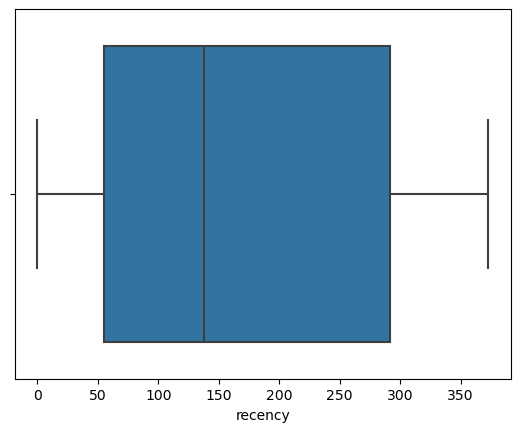

frequency: 


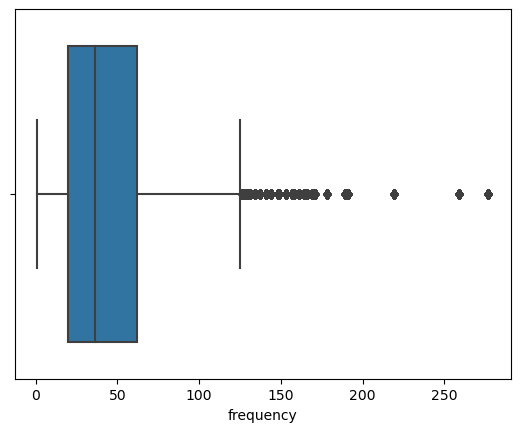

monetary_value: 


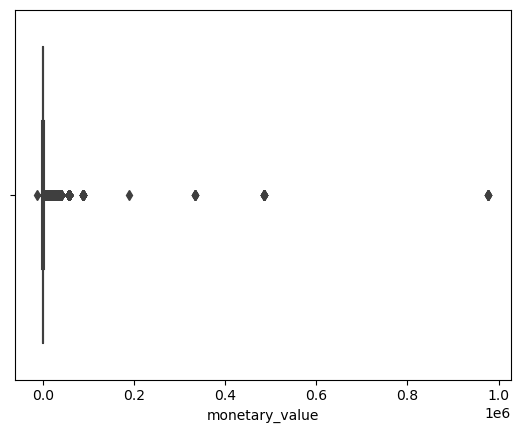

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt
list1 = ['recency','frequency','monetary_value']
for i in list1:
    print(str(i)+': ')
    ax = sns.boxplot(x=final_df[str(i)])
    plt.show()

In [49]:
from scipy import stats
import numpy as np
# remove the customer id column
new_df = final_df[['recency','frequency','monetary_value']]
# remove outliers
z_scores = stats.zscore(new_df)
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
new_df = new_df[filtered_entries]

new_df

,recency,frequency,monetary_value
1,6,31,1246.73
2,6,31,1246.73
3,6,31,1246.73
4,6,31,1246.73
5,6,31,1246.73
...,...,...,...
100805,172,29,863.40
100806,172,29,863.40
100807,172,29,863.40
100808,172,29,863.40


In [50]:
from sklearn.preprocessing import StandardScaler
new_df = new_df.drop_duplicates()
col_names = ['recency', 'frequency', 'monetary_value']
features = new_df[col_names]
scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)
scaled_features = pd.DataFrame(features, columns = col_names)

In [51]:
scaled_features

,recency,frequency,monetary_value
0,-1.196723,0.379971,0.185080
1,-1.120665,-0.259085,1.965919
2,1.752654,2.297138,0.401256
3,-0.715020,-0.259085,-0.217826
4,-0.596706,-0.350378,0.011294
...,...,...,...
4348,-0.436139,-0.578613,-0.405754
4349,0.383602,-0.715553,-0.485640
4350,0.839953,-0.715553,-0.446353
4351,-0.943195,1.566788,-0.422167


## Building The Customer Segmentation Model

Text(0, 0.5, 'Inertia')

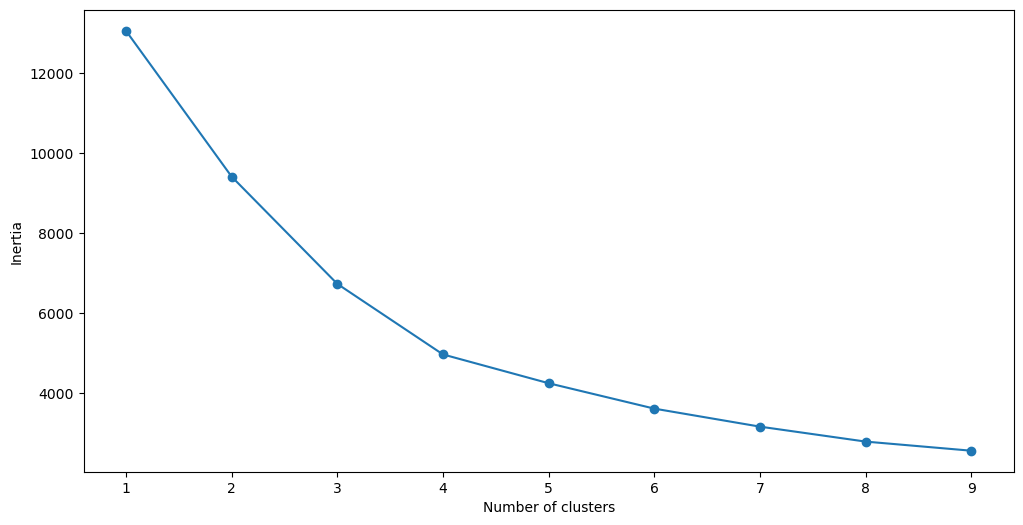

In [52]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
SSE = []
for cluster in range(1,10):
    kmeans = KMeans(n_clusters = cluster, init='k-means++')
    kmeans.fit(scaled_features)
    SSE.append(kmeans.inertia_)
# converting the results into a dataframe and plotting them
frame = pd.DataFrame({'Cluster':range(1,10), 'SSE':SSE})
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'], frame['SSE'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

In [53]:
# First, build a model with 4 clusters
kmeans = KMeans( n_clusters = 4, init='k-means++')
kmeans.fit(scaled_features)

KMeans(n_clusters=4)

In [54]:
print(silhouette_score(scaled_features, kmeans.labels_, metric='euclidean'))

0.43600059110868045


In [55]:
pred = kmeans.predict(scaled_features)
frame = pd.DataFrame(new_df)
frame['cluster'] = pred

In [56]:
frame

,recency,frequency,monetary_value,cluster
1,6,31,1246.73,1
32,15,17,4311.90,1
49,355,73,1618.81,0
122,63,17,553.25,1
139,77,15,947.61,1
...,...,...,...,...
100700,96,10,229.79,1
100710,193,7,92.29,2
100717,247,7,159.91,2
100724,36,57,201.54,0


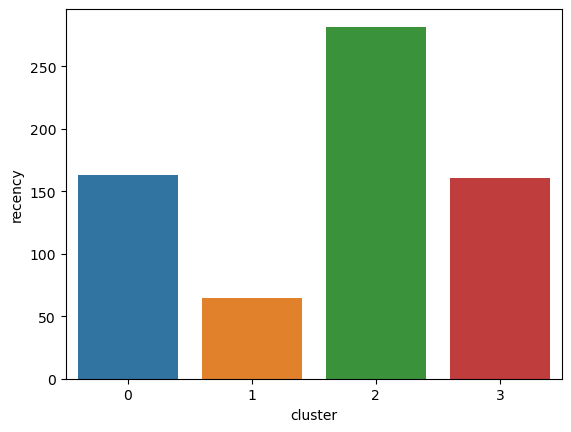

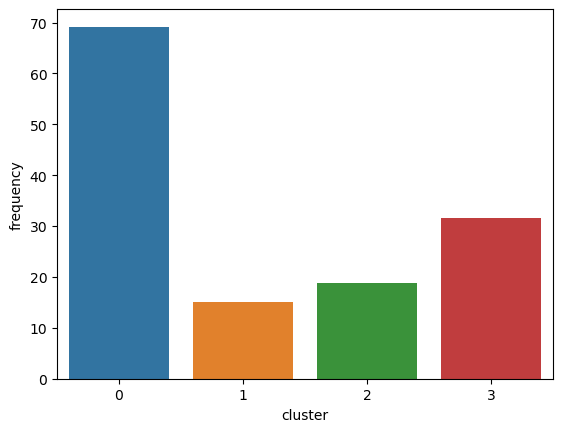

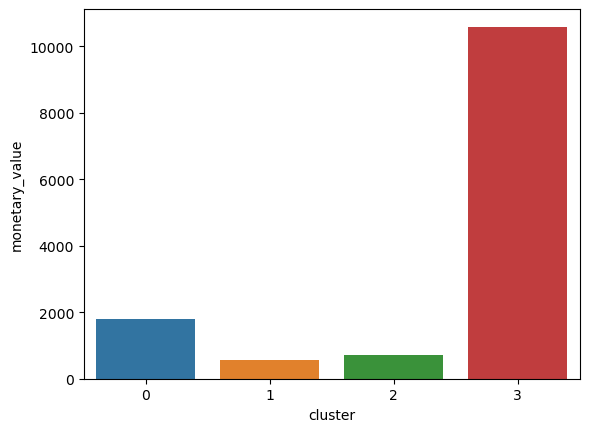

In [57]:
avg_df = frame.groupby(['cluster'], as_index=False).mean()
for i in list1:
    sns.barplot(x='cluster',y=str(i),data=avg_df)
    plt.show()